## MODIS AOD Visualizatiosn

In [1]:
import tables
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## File Import

In [2]:
aod_arr = pd.read_hdf("aod_r.h5")

In [3]:
aod_arr_ts = np.array(aod_arr.T)

## Time Series Plotting Function

In [11]:
# Source: https://github.com/arviz-devs/arviz/issues/2?fbclid=IwAR2cLTYn3DKrO_vaREhj2tgTlAkM619h4sendx90CRb-5ghop1_tqDla6wQ#issuecomment-310468720

def tsplot(x, y, n=20, percentile_min=1, percentile_max=99, color='red', plot_mean=True, plot_median=False, line_color='black', **kwargs):
    # calculate the lower and upper percentile groups, skipping 50 percentile
    perc1 = np.percentile(y, np.linspace(percentile_min, 50, num=n, endpoint=False), axis=0)
    perc2 = np.percentile(y, np.linspace(50, percentile_max, num=n+1)[1:], axis=0)

    if 'alpha' in kwargs:
        alpha = kwargs.pop('alpha')
    else:
        alpha = 1/n
    # fill lower and upper percentile groups
    fig, ax = plt.subplots(1,1, figsize=(21,7))

    for p1, p2 in zip(perc1, perc2):
        plt.fill_between(x, p1, p2, alpha=alpha, color=color, edgecolor=None)


    if plot_mean:
        plt.plot(x, np.mean(y, axis=0), color=line_color)


    if plot_median:
        plt.plot(x, np.median(y, axis=0), color=line_color)
        
#     ax.set_title("Mean 2019 Daily AQS PM2.5 Concentration Measurements, California", fontsize = 24)
    ax.set_xlabel("Day", fontsize = 16)
    ax.set_ylabel("Aerosol Optical Depth at 550nm", fontsize = 16)
    
    fig.savefig("aod_2018_percentiles.png")
    
    return plt.gca()

In [9]:
plt.style.use("ggplot")

In [6]:
aod_arr_ts[np.where(aod_arr_ts > 5000)] = 0

In [7]:
aod_arr_ts = aod_arr_ts / 1000

TypeError: savefig() missing 1 required positional argument: 'fname'

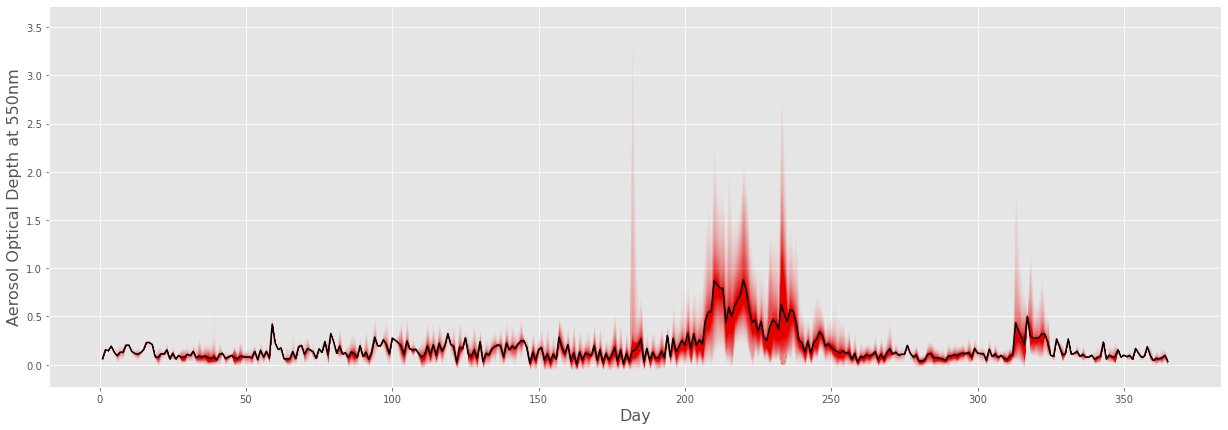

In [12]:
tsplot(np.array(range(1, 366)), 
       aod_arr_ts[:, 2922:3287], n=365, 
       percentile_min=2.5, percentile_max=97.5, 
       plot_median=True, plot_mean=False)

## Spatial Domain Map

No handles with labels found to put in legend.


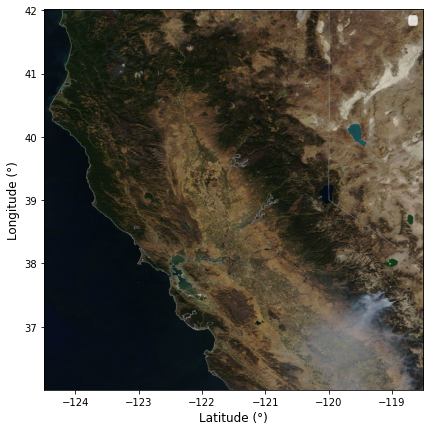

In [5]:
import rasterio
from rasterio.plot import show
fp = r'grid_map_final.tiff'
img = rasterio.open(fp)
fig, ax = plt.subplots(1,1, figsize=(21,7))
fires = ax.scatter([0], [0], s=10, color="orange")
# fires.set_label("MODIS Active Fire Pixels")
# ax.set_title("MODIS Terra and Aqua Imagery, Western US, August 20, 2020")
ax.set_xlabel("Latitude (°)", fontsize=12)
ax.set_ylabel("Longitude (°)", fontsize=12)
# ax.set_xticks(np.arange(-124.5, -118.5, 0.05))
# ax.set_yticks(np.arange(36, 42., 0.05))
ax.legend(fontsize = 12)
plt.grid(False)
show(img, ax=ax)
fig.savefig("grid_map_final.png")
# ax.grid(which='major', axis='both', linestyle='-')